Reference: https://huggingface.co/datasets/benstaf/nasdaq_2013_2023/tree/main

1. sentiment_nasdaq_news.csv is the input file
2. Sentiment values have been computed for Apple stocks using the simple role based prompting appproach from the reference paper [1]. The sentiment scores are the signals generated by the DeepSeek-V3 by connecting through deepinfra's API.  
3. Sentiment values have been computed using a naive few shot prompting approach just to compare the difference in the outputs generated using a histogram
4. However, the output of the prompt used in reference paper is retained and used for further analysis and comparison with results generated using other prompting approaches (viz. few shot, counterfatual and chain of thought)  
5. In this program the sentiment values generated have been captured in output_11Apr_1.csv.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/finrl_data/sentiment_nasdaq_news.csv'


Mounted at /content/drive


In [ ]:
import pandas as pd

chunk_size = 100_000  # or even 50_000 if needed

for chunk in pd.read_csv(csv_path, chunksize=chunk_size):
    print(chunk.head())  # or do processing here


   Unnamed: 0.1  Unnamed: 0                     Date  \
0             0     12034.0  2023-12-16 18:00:00 UTC   
1             1     12068.0  2023-12-15 00:00:00 UTC   
2             2     12072.0  2023-12-14 00:00:00 UTC   
3             3     12092.0  2023-12-13 00:00:00 UTC   
4             4     12138.0  2023-12-12 00:00:00 UTC   

                                       Article_title Stock_symbol  \
0  Is FlexShares STOXX US ESG Select Index Fund (...         AAPL   
1                   Guru Fundamental Report for AAPL         AAPL   
2  2 Hot Warren Buffett Stocks That Raised Their ...         AAPL   
3  Technology Sector Update for 12/14/2023: ADBE,...         AAPL   
4  Up 149% YTD, How High Can Roku (NASDAQ:ROKU) S...         AAPL   

                                                 Url Publisher  Author  \
0  https://www.nasdaq.com/articles/is-flexshares-...       NaN     NaN   
1  https://www.nasdaq.com/articles/guru-fundament...       NaN     NaN   
2  https://www.nasdaq.com/

In [ ]:
chunk.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary,Sentiment_llama3.1-8b
14052,14052,626260.0,2021-08-13 00:00:00 UTC,3 No-Brainer Stocks to Consider if You're Worr...,COST,https://www.nasdaq.com/articles/3-no-brainer-s...,NaN,NaN,As the world slowly opens back up and the econ...,It's Costco Wholesale's (NASDAQ: COST) valuabl...,It's Costco Wholesale's (NASDAQ: COST) valuabl...,"Chipotle, Costco, and Netflix are all companie...","Earlier this year, Costco announced that start...",NaN
14053,14053,626262.0,2021-08-10 00:00:00 UTC,2 Retail Stocks You Can Buy and Hold for the N...,COST,https://www.nasdaq.com/articles/2-retail-stock...,NaN,NaN,"While it may seem like time flies by, a decade...",The approach continues to retain and attract m...,Costco Costco (NASDAQ: COST) is known for sell...,Costco ended last year with 58.1 million payin...,The Motley Fool owns shares of and recommends ...,NaN
14054,14054,626263.0,2021-08-09 00:00:00 UTC,Best Consumer Discretionary Stocks To Buy Now?...,COST,https://www.nasdaq.com/articles/best-consumer-...,NaN,NaN,5 Hot Consumer Discretionary Stocks For Your L...,5 Top Consumer Discretionary Stocks To Watch T...,5 Top Consumer Discretionary Stocks To Watch T...,5 Top Consumer Discretionary Stocks To Watch T...,5 Top Consumer Discretionary Stocks To Watch T...,NaN
14055,14055,626264.0,2021-08-08 00:00:00 UTC,7 REITs I Own and Never Plan to Sell,COST,https://www.nasdaq.com/articles/7-reits-i-own-...,NaN,NaN,"I'm known around The Motley Fool as ""The REIT ...","They own a lot of Dollar Store properties, who...","They own a lot of Dollar Store properties, who...","They own a lot of Dollar Store properties, who...","They own a lot of Dollar Store properties, who...",NaN
14056,14056,626265.0,2021-08-06 00:00:00 UTC,"Notable Friday Option Activity: COST, ETSY, JPM",COST,https://www.nasdaq.com/articles/notable-friday...,NaN,NaN,Looking at options trading activity among comp...,Especially high volume was seen for the $440 s...,Below is a chart showing COST's trailing twelv...,Looking at options trading activity among comp...,Looking at options trading activity among comp...,NaN


In [ ]:
chunks = []
for chunk in pd.read_csv(csv_path, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df_full = pd.concat(chunks, ignore_index=True)

In [ ]:
df_full.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary,Sentiment_llama3.1-8b
14052,14052,626260.0,2021-08-13 00:00:00 UTC,3 No-Brainer Stocks to Consider if You're Worr...,COST,https://www.nasdaq.com/articles/3-no-brainer-s...,NaN,NaN,As the world slowly opens back up and the econ...,It's Costco Wholesale's (NASDAQ: COST) valuabl...,It's Costco Wholesale's (NASDAQ: COST) valuabl...,"Chipotle, Costco, and Netflix are all companie...","Earlier this year, Costco announced that start...",NaN
14053,14053,626262.0,2021-08-10 00:00:00 UTC,2 Retail Stocks You Can Buy and Hold for the N...,COST,https://www.nasdaq.com/articles/2-retail-stock...,NaN,NaN,"While it may seem like time flies by, a decade...",The approach continues to retain and attract m...,Costco Costco (NASDAQ: COST) is known for sell...,Costco ended last year with 58.1 million payin...,The Motley Fool owns shares of and recommends ...,NaN
14054,14054,626263.0,2021-08-09 00:00:00 UTC,Best Consumer Discretionary Stocks To Buy Now?...,COST,https://www.nasdaq.com/articles/best-consumer-...,NaN,NaN,5 Hot Consumer Discretionary Stocks For Your L...,5 Top Consumer Discretionary Stocks To Watch T...,5 Top Consumer Discretionary Stocks To Watch T...,5 Top Consumer Discretionary Stocks To Watch T...,5 Top Consumer Discretionary Stocks To Watch T...,NaN
14055,14055,626264.0,2021-08-08 00:00:00 UTC,7 REITs I Own and Never Plan to Sell,COST,https://www.nasdaq.com/articles/7-reits-i-own-...,NaN,NaN,"I'm known around The Motley Fool as ""The REIT ...","They own a lot of Dollar Store properties, who...","They own a lot of Dollar Store properties, who...","They own a lot of Dollar Store properties, who...","They own a lot of Dollar Store properties, who...",NaN
14056,14056,626265.0,2021-08-06 00:00:00 UTC,"Notable Friday Option Activity: COST, ETSY, JPM",COST,https://www.nasdaq.com/articles/notable-friday...,NaN,NaN,Looking at options trading activity among comp...,Especially high volume was seen for the $440 s...,Below is a chart showing COST's trailing twelv...,Looking at options trading activity among comp...,Looking at options trading activity among comp...,NaN


In [ ]:
df_full.shape

(14057, 14)

In [ ]:
df_full.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Article_title', 'Stock_symbol',
       'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary',
       'Textrank_summary', 'Lexrank_summary', 'Sentiment_llama3.1-8b'],
      dtype='object')

In [ ]:
df_full = df_full[['Date', 'Stock_symbol', 'Lsa_summary']]

In [ ]:
df_full.columns

Index(['Date', 'Stock_symbol', 'Lsa_summary'], dtype='object')

In [ ]:
df_full.head()

,Date,Stock_symbol,Lsa_summary
0,2023-12-16 18:00:00 UTC,AAPL,"Taking into account individual holdings, Amazo..."
1,2023-12-15 00:00:00 UTC,AAPL,APPLE INC (AAPL) is a large-cap growth stock i...
2,2023-12-14 00:00:00 UTC,AAPL,Let's dig into the payout enhancements from th...
3,2023-12-13 00:00:00 UTC,AAPL,Apple (AAPL) and Alphabet's (GOOG) Google were...
4,2023-12-12 00:00:00 UTC,AAPL,Roku is also valued cheaper than its bigger co...


In [ ]:
df_full.tail()

,Date,Stock_symbol,Lsa_summary
14052,2021-08-13 00:00:00 UTC,COST,It's Costco Wholesale's (NASDAQ: COST) valuabl...
14053,2021-08-10 00:00:00 UTC,COST,The approach continues to retain and attract m...
14054,2021-08-09 00:00:00 UTC,COST,5 Top Consumer Discretionary Stocks To Watch T...
14055,2021-08-08 00:00:00 UTC,COST,"They own a lot of Dollar Store properties, who..."
14056,2021-08-06 00:00:00 UTC,COST,Especially high volume was seen for the $440 s...


In [ ]:
tickers_full = list(df_full['Stock_symbol'].unique())
print(tickers_full)

['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR', 'CDNS', 'CHTR', 'CMCSA', 'COST']


In [ ]:
filtered_chunks = []
for chunk in pd.read_csv(csv_path, chunksize=chunk_size):
    filtered = chunk[chunk['Stock_symbol'] == 'AAPL']
    filtered_chunks.append(filtered)

df_aapl = pd.concat(filtered_chunks, ignore_index=True)

In [ ]:
df_aapl.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary,Sentiment_llama3.1-8b
553,553,20833.0,2022-06-07 00:00:00 UTC,"US STOCKS-Wall St gains with tech, energy; Tar...",AAPL,https://www.nasdaq.com/articles/us-stocks-wall...,NaN,NaN,"By Caroline Valetkevitch\nNEW YORK, June 7 (Re...",Apple Inc AAPL.O shares were up 1.8%. The gain...,Apple Inc AAPL.O shares were up 1.8%. By Carol...,Apple Inc AAPL.O shares were up 1.8%. By Carol...,Apple Inc AAPL.O shares were up 1.8%. By Carol...,NaN
554,554,20869.0,2022-06-06 00:00:00 UTC,"Don’t Fear Recession, Prepare Instead",AAPL,https://www.nasdaq.com/articles/dont-fear-rece...,NaN,NaN,"InvestorPlace - Stock Market News, Stock Advic...","Furthermore, many of our Breakthrough Stocks a...","Furthermore, many of our Breakthrough Stocks a...","Furthermore, many of our Breakthrough Stocks a...","Furthermore, many of our Breakthrough Stocks a...",NaN
555,555,20873.0,2022-06-05 00:00:00 UTC,"If I Could Buy Only 1 Warren Buffett Stock, Th...",AAPL,https://www.nasdaq.com/articles/if-i-could-buy...,NaN,NaN,Don't underestimate the power of Berkshire Hat...,Apple (NASDAQ: AAPL) ranks as the biggest hold...,Apple (NASDAQ: AAPL) ranks as the biggest hold...,Apple (NASDAQ: AAPL) ranks as the biggest hold...,Apple (NASDAQ: AAPL) ranks as the biggest hold...,4.0
556,556,20876.0,2022-06-04 00:00:00 UTC,How Advertising's Massive Shift Affects Facebo...,AAPL,https://www.nasdaq.com/articles/how-advertisin...,NaN,NaN,The digital advertising landscape changed dram...,The app tracking transparency changes that App...,The app tracking transparency changes that App...,The app tracking transparency changes that App...,The app tracking transparency changes that App...,3.0
557,557,20889.0,2022-06-03 00:00:00 UTC,Consider Alphabet Stock Even in a Recession,AAPL,https://www.nasdaq.com/articles/consider-alpha...,NaN,NaN,"InvestorPlace - Stock Market News, Stock Advic...","This is why the Federal Reserve (Fed), who con...","InvestorPlace - Stock Market News, Stock Advic...","Ticker Company Price GOOG Alphabet Inc. $2,202...","Ticker Company Price GOOG Alphabet Inc. $2,202...",3.0


In [ ]:
df_aapl=df_aapl[['Date', 'Stock_symbol', 'Lsa_summary']]

In [ ]:
df_full.isna().sum()

,0
Date,0
Stock_symbol,0
Lsa_summary,486


In [ ]:
df_aapl.isna().sum()

,0
Date,0
Stock_symbol,0
Lsa_summary,0


In [ ]:
df_full.shape

(14057, 3)

In [ ]:
df_full.to_csv('/content/sentiment_nasdaq_news_filtered_columns_allstocks.csv', index=False)

In [ ]:
df_aapl.shape

(558, 3)

In [ ]:
df_aapl.columns

Index(['Date', 'Stock_symbol', 'Lsa_summary'], dtype='object')

In [ ]:
df_aapl

,Date,Stock_symbol,Lsa_summary
0,2023-12-16 18:00:00 UTC,AAPL,"Taking into account individual holdings, Amazo..."
1,2023-12-15 00:00:00 UTC,AAPL,APPLE INC (AAPL) is a large-cap growth stock i...
2,2023-12-14 00:00:00 UTC,AAPL,Let's dig into the payout enhancements from th...
3,2023-12-13 00:00:00 UTC,AAPL,Apple (AAPL) and Alphabet's (GOOG) Google were...
4,2023-12-12 00:00:00 UTC,AAPL,Roku is also valued cheaper than its bigger co...
...,...,...,...
553,2022-06-07 00:00:00 UTC,AAPL,Apple Inc AAPL.O shares were up 1.8%. The gain...
554,2022-06-06 00:00:00 UTC,AAPL,"Furthermore, many of our Breakthrough Stocks a..."
555,2022-06-05 00:00:00 UTC,AAPL,Apple (NASDAQ: AAPL) ranks as the biggest hold...
556,2022-06-04 00:00:00 UTC,AAPL,The app tracking transparency changes that App...


In [ ]:
df_aapl.to_csv('/content/aapl_filtered.csv', index=False)

In [ ]:
tickers = list(df_full['Stock_symbol'].unique())
print(tickers)

['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR', 'CDNS', 'CHTR', 'CMCSA', 'COST']


In [ ]:
df_temp = pd.read_csv('/content/aapl_filtered.csv')
df_temp.shape

(558, 3)

In [ ]:
import os
import time
import numpy as np
import pandas as pd
from openai import OpenAI

In [ ]:
# Set your OpenAI API key and base URL
openai = OpenAI(
    api_key= "XXXXXX",  #Replace with your actual DeepInfra api key
    base_url="https://api.deepinfra.com/v1/openai",
)

In [ ]:
stream = False  # Set to True if you want to stream the response
model_used = 'sentiment_deepseek'  # Define the model_used variable

In [ ]:
#option 1 leading to output_11Apr_1.csv
#copied from raw code of Mostapha
def get_sentiment_option1(symbol, *texts):
    texts = [text for text in texts if text != 0]
    num_text = len(texts)
    text_content = " ".join([f"### News to Stock Symbol -- {symbol}: {text}" for text in texts])

    conversation = [
        {"role": "system",
         "content": f"Forget all your previous instructions. You are a financial expert with stock recommendation experience. Based on a specific stock, score for range from 1 to 5, where 1 is negative, 2 is somewhat negative, 3 is neutral, 4 is somewhat positive, 5 is positive. {num_text} summarized news will be passed in each time, you will give score in format as shown below in the response from assistant."},
        {"role": "user",
         "content": f"News to Stock Symbol -- AAPL: Apple (AAPL) increase 22% ### News to Stock Symbol -- AAPL: Apple (AAPL) price decreased 30% ### News to Stock Symbol -- MSFT: Microsoft (MSTF) price has no change"},
        {"role": "assistant", "content": "5, 1, 3"},
        {"role": "user",
         "content": f"News to Stock Symbol -- AAPL: Apple (AAPL) announced iPhone 15 ### News to Stock Symbol -- AAPL: Apple (AAPL) will release VisonPro on Feb 2, 2024"},
        {"role": "assistant", "content": "4, 4"},
        {"role": "user", "content": text_content},
    ]

    try:
        chat_completion = openai.chat.completions.create(
    #        model='deepseek-ai/DeepSeek-R1-Distill-Llama-70B',
            model='deepseek-ai/DeepSeek-V3',
            messages=conversation,
            temperature=0,
            max_tokens=50,
            stream=stream,
        )

        if stream:
            content = ""
            for event in chat_completion:
                if event.choices[0].finish_reason:
                    print(event.choices[0].finish_reason,
                          event.usage['prompt_tokens'],
                          event.usage['completion_tokens'])
                else:
                    content += event.choices[0].delta.content
            print(content)
        else:
            content = chat_completion.choices[0].message.content
            print(content)
            print(chat_completion.usage.prompt_tokens, chat_completion.usage.completion_tokens)

    except Exception as e:
        print(f"Error: {e}")
        return [np.nan] * num_text

    sentiments = []
    for sentiment in content.split(','):
        try:
            sentiment_value = int(sentiment.strip())
        except ValueError:
            print("content error")
            print("sentiment was: " + str(sentiment.strip()))
            sentiment_value = np.nan
        sentiments.append(sentiment_value)
    return sentiments


In [ ]:
df_temp=pd.read_csv('/content/aapl_filtered.csv')
df_temp

,Date,Stock_symbol,Lsa_summary
0,2023-12-16 18:00:00 UTC,AAPL,"Taking into account individual holdings, Amazo..."
1,2023-12-15 00:00:00 UTC,AAPL,APPLE INC (AAPL) is a large-cap growth stock i...
2,2023-12-14 00:00:00 UTC,AAPL,Let's dig into the payout enhancements from th...
3,2023-12-13 00:00:00 UTC,AAPL,Apple (AAPL) and Alphabet's (GOOG) Google were...
4,2023-12-12 00:00:00 UTC,AAPL,Roku is also valued cheaper than its bigger co...
...,...,...,...
553,2022-06-07 00:00:00 UTC,AAPL,Apple Inc AAPL.O shares were up 1.8%. The gain...
554,2022-06-06 00:00:00 UTC,AAPL,"Furthermore, many of our Breakthrough Stocks a..."
555,2022-06-05 00:00:00 UTC,AAPL,Apple (NASDAQ: AAPL) ranks as the biggest hold...
556,2022-06-04 00:00:00 UTC,AAPL,The app tracking transparency changes that App...


In [ ]:
#option 1
#for sentiment only
def process_csv_option1(input_csv_path, output_csv_path, batch_size=5, chunk_size=1000):
    start_time = time.time()

    # Check if the output file exists and load the last processed row
    if os.path.exists(output_csv_path):
        output_df = pd.read_csv(output_csv_path,
        on_bad_lines='warn',
        engine='python'
)
        last_processed_row = len(output_df)
    else:
        last_processed_row = 0

    # Read the CSV file in chunks
    chunks = pd.read_csv(input_csv_path, encoding="utf-8", chunksize=chunk_size,
    on_bad_lines='warn',
    engine='python'     # Print a warning for each skipped line
    )

    for chunk_number, chunk in enumerate(chunks):
        # Skip already processed chunks
        if chunk_number * chunk_size < last_processed_row:
            continue

        chunk.columns = chunk.columns.str.capitalize()
        if model_used not in chunk.columns:
            chunk[model_used] = np.nan

        for i in range(0, len(chunk), batch_size):
            batch = chunk.iloc[i:i + batch_size]
            texts = batch['Lsa_summary'].tolist()
            symbol = batch.iloc[0]['Stock_symbol']  # Extract the stock symbol for the current batch
            sentiments = get_sentiment_option1(symbol, *texts)

            for j, sentiment in enumerate(sentiments):
                if i + j < len(chunk):
                    chunk.loc[chunk.index[i + j], model_used] = sentiment

        # Append the processed chunk to the output file
        chunk.to_csv(output_csv_path, mode='a', header=not os.path.exists(output_csv_path), index=False)

    print(f"Process completed in {time.time() - start_time:.2f} seconds.")


In [ ]:
#option 2 leading to output_11Apr_2.csv
#modifed version of the above prompt for few shot prompting
def get_sentiment_option2(symbol, *texts):
    texts = [text for text in texts if text != 0]
    num_text = len(texts)
    text_content = " ".join([f"### News to Stock Symbol -- {symbol}: {text}" for text in texts])

    conversation = [
        {
            "role": "system",
            "content": (
                "You are a financial sentiment analysis expert. Your task is to evaluate sentiment of news headlines "
                "about specific stock symbols. Use a scoring scale from 1 to 5:\n"
                "1 = Strong Negative, 2 = Mild Negative, 3 = Neutral, 4 = Mild Positive, 5 = Strong Positive.\n\n"
                "For each headline, analyze its sentiment *in the context of its effect on the stock*, and respond with "
                "a comma-separated list of scores in order.\n\n"
                f"{num_text} news items will be provided per query."
            )
        },
        {
            "role": "user",
            "content": (
                "### News to Stock Symbol -- AAPL: Apple (AAPL) revenue drops 12% in Q2\n"
                "### News to Stock Symbol -- AAPL: Apple launches new iPhone SE at budget pricing\n"
                "### News to Stock Symbol -- MSFT: Microsoft (MSFT) completes acquisition of OpenAI stake"
            )
        },
        {"role": "assistant", "content": "2, 4, 4"},
        {
            "role": "user",
            "content": (
                "### News to Stock Symbol -- TSLA: Tesla (TSLA) vehicles recalled for braking issue\n"
                "### News to Stock Symbol -- TSLA: Tesla announces 2-for-1 stock split"
            )
        },
        {"role": "assistant", "content": "1, 5"},
        {
            "role": "user",
            "content": text_content
        }
    ]

    return conversation


In [ ]:
#option 2 to take care of indexing issues
#for sentiment only
def process_csv_option2(input_csv_path, output_csv_path, batch_size=5, chunk_size=1000):
    start_time = time.time()

    # Check if the output file exists and load the last processed row
    if os.path.exists(output_csv_path):
        output_df = pd.read_csv(output_csv_path,
        on_bad_lines='warn',
        engine='python'
)
        last_processed_row = len(output_df)
    else:
        last_processed_row = 0

    # Read the CSV file in chunks
    chunks = pd.read_csv(input_csv_path, encoding="utf-8", chunksize=chunk_size,
    on_bad_lines='warn',
    engine='python'     # Print a warning for each skipped line
    )

    for chunk_number, chunk in enumerate(chunks):
        # Skip already processed chunks
        if chunk_number * chunk_size < last_processed_row:
            continue

        chunk.columns = chunk.columns.str.capitalize()
        if model_used not in chunk.columns:
            chunk[model_used] = np.nan

        for i in range(0, len(chunk), batch_size):
            batch = chunk.iloc[i:i + batch_size]
            texts = batch['Lsa_summary'].tolist()
            symbol = batch.iloc[0]['Stock_symbol']  # Extract the stock symbol for the current batch

            # Get the conversation instead of directly calling OpenAI API
            conversation = get_sentiment_option2(symbol, *texts)

            # This is where the API call should be made
            chat_completion = openai.chat.completions.create(
                model='deepseek-ai/DeepSeek-V3',  # Replace with the actual model you intend to use
                messages=conversation,
                temperature=0,
                max_tokens=50,
                stream=stream,
            )

            content = chat_completion.choices[0].message.content
            sentiments = [int(sentiment.strip()) for sentiment in content.split(',')]

            for j, sentiment in enumerate(sentiments):
                if i + j < len(chunk):
                    chunk.loc[chunk.index[i + j], model_used] = sentiment

        # Append the processed chunk to the output file
        chunk.to_csv(output_csv_path, mode='a', header=not os.path.exists(output_csv_path), index=False)

    print(f"Process completed in {time.time() - start_time:.2f} seconds.")

In [ ]:
if __name__ == "__main__":
    input_file = '/content/aapl_filtered.csv'  # Replace with your input file path
    output_file = 'output_11Apr_1.csv'
    process_csv_option1(input_file, output_file, batch_size=5, chunk_size=1000)

3, 3, 3, 3, 3
858 14
2, 4, 3, 4, 3
722 14
4, 3, 2, 3, 3
852 14
3, 3, 3, 3, 3
963 14
4, 4, 3, 3, 4
837 14
4, 3, 4, 3, 4
676 14
3, 3, 4, 3, 4
927 14
4, 3, 2, 4, 4
847 14
3, 3, 3, 3, 4
1108 14
2, 3, 3, 4, 4
872 14
3, 3, 2, 2, 4
933 14
2, 4, 3, 3, 4
786 14
2, 3, 4, 4, 2
910 14
3, 3, 3, 4, 3
941 14
5, 3, 4, 2, 3
768 14
5, 2, 3, 4, 2
885 14
3, 3, 3, 4, 4
795 14
3, 3, 4, 2, 4
856 14
2, 3, 3, 2, 3
783 14
3, 3, 4, 3, 2
778 14
4, 3, 3, 3, 4
887 14
4, 4, 3, 3, 4
990 14
3, 4, 3, 3, 4
946 14
3, 3, 3, 4, 2
1006 14
4, 4, 3, 3, 2
842 14
5, 3, 5, 5, 4
918 14
4, 2, 3, 3, 2
896 14
3, 3, 3, 3, 3
1153 14
4, 3, 4, 3, 4
843 14
3, 4, 4, 3, 4
1161 14
4, 4, 3, 4, 3
767 14
3, 3, 3, 4, 4
869 14
4, 4, 4, 3, 3
783 14
4, 3, 4, 4, 5
914 14
5, 4, 4, 3, 5
770 14
4, 4, 2, 3, 3
938 14
4, 5, 3, 4, 4
928 14
4, 4, 4, 3, 4
735 14
3, 3, 4, 4, 4
924 14
3, 4, 4, 3, 3
700 14
3, 4, 4, 4, 3
814 14
4, 2, 3, 4, 4
1020 14
4, 3, 2, 3, 4
809 14
3, 3, 3, 3, 3
903 14
2, 4, 3, 1, 4
883 14
4, 3, 4, 4, 3
977 14
5, 3, 3, 4, 2
834 14
3, 3, 3,

In [ ]:
df_output=pd.read_csv('/content/output_11Apr_1.csv')
df_output

,Date,Stock_symbol,Lsa_summary,sentiment_deepseek
0,2023-12-16 18:00:00 UTC,AAPL,"Taking into account individual holdings, Amazo...",3.0
1,2023-12-15 00:00:00 UTC,AAPL,APPLE INC (AAPL) is a large-cap growth stock i...,3.0
2,2023-12-14 00:00:00 UTC,AAPL,Let's dig into the payout enhancements from th...,3.0
3,2023-12-13 00:00:00 UTC,AAPL,Apple (AAPL) and Alphabet's (GOOG) Google were...,3.0
4,2023-12-12 00:00:00 UTC,AAPL,Roku is also valued cheaper than its bigger co...,3.0
...,...,...,...,...
553,2022-06-07 00:00:00 UTC,AAPL,Apple Inc AAPL.O shares were up 1.8%. The gain...,3.0
554,2022-06-06 00:00:00 UTC,AAPL,"Furthermore, many of our Breakthrough Stocks a...",2.0
555,2022-06-05 00:00:00 UTC,AAPL,Apple (NASDAQ: AAPL) ranks as the biggest hold...,3.0
556,2022-06-04 00:00:00 UTC,AAPL,The app tracking transparency changes that App...,3.0


In [ ]:
if __name__ == "__main__":
    input_file = '/content/aapl_filtered.csv'  # Replace with your input file path
    output_file = 'output_11Apr_2.csv'
    process_csv_option2(input_file, output_file, batch_size=5, chunk_size=1000)

Process completed in 107.74 seconds.


In [ ]:
df_output=pd.read_csv('/content/output_11Apr_2.csv')
df_output

,Date,Stock_symbol,Lsa_summary,sentiment_deepseek
0,2023-12-16 18:00:00 UTC,AAPL,"Taking into account individual holdings, Amazo...",3.0
1,2023-12-15 00:00:00 UTC,AAPL,APPLE INC (AAPL) is a large-cap growth stock i...,3.0
2,2023-12-14 00:00:00 UTC,AAPL,Let's dig into the payout enhancements from th...,3.0
3,2023-12-13 00:00:00 UTC,AAPL,Apple (AAPL) and Alphabet's (GOOG) Google were...,3.0
4,2023-12-12 00:00:00 UTC,AAPL,Roku is also valued cheaper than its bigger co...,3.0
...,...,...,...,...
553,2022-06-07 00:00:00 UTC,AAPL,Apple Inc AAPL.O shares were up 1.8%. The gain...,4.0
554,2022-06-06 00:00:00 UTC,AAPL,"Furthermore, many of our Breakthrough Stocks a...",3.0
555,2022-06-05 00:00:00 UTC,AAPL,Apple (NASDAQ: AAPL) ranks as the biggest hold...,4.0
556,2022-06-04 00:00:00 UTC,AAPL,The app tracking transparency changes that App...,3.0


Histogram

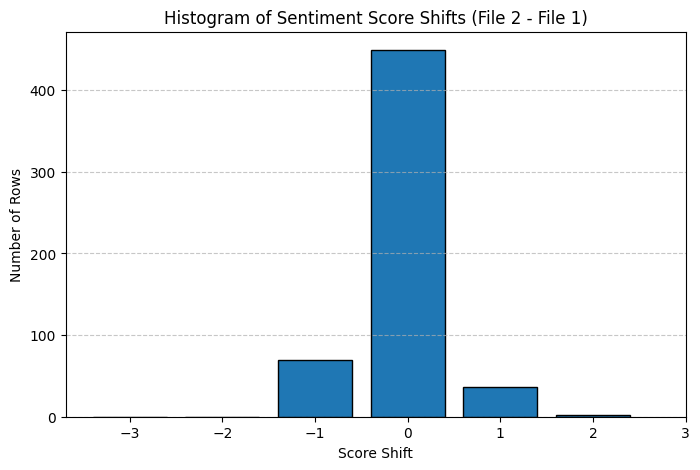

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files
df1 = pd.read_csv('/content/output_11Apr_1.csv')
df2 = pd.read_csv('/content/output_11Apr_2.csv')

# Compute score differences
score_diff = df2['sentiment_deepseek'] - df1['sentiment_deepseek']

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(score_diff, bins=[-3, -2, -1, 0, 1, 2, 3], edgecolor='black', align='left', rwidth=0.8)
plt.title("Histogram of Sentiment Score Shifts (File 2 - File 1)")
plt.xlabel("Score Shift")
plt.ylabel("Number of Rows")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(-3, 4))
plt.show()


Here’s the analysis comparing the `sentiment_deepseek` scores between the two files:

- 📊 **Total Rows Compared**: 558
- 🔁 **Total Differences**: 98 rows
  - 🔼 **Scores Increased** (File 2 > File 1): 36 rows
  - 🔽 **Scores Decreased** (File 2 < File 1): 62 rows
  - ⚖️ **Scores Unchanged**: 460 rows

So overall, the second file tends to assign **lower sentiment scores** slightly more often than higher ones.

Would you like a breakdown of specific rows where the largest changes occurred, or a histogram of how the scores shifted?